In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from nltk.corpus import stopwords, gutenberg
from collections import Counter
import re
import scipy
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
per_15 = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
          'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
          'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
          'younger_sister_anon', 'st_stephen_anon']
per_16_17 = ['phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope']
per_18 = ['america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
          '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
          'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
          'darkness_byron', 'dear_doctor_byron']
per_19_1 =['of_mere_stevens', 'snowman_stevens', 'key_west_stevens', 'modern_poetry_stevens', 
           'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
           'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
           'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
           'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings']
per_19_2 = [ 'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 
             'sunflower_ginsberg', 'america_ginsberg', 'fever_plath', 
             'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 
             'phenom_woman_angelou','personal_ohara', 'ave_maria_ohara', 'the_day_ohara']

files = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
         'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
         'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
         'younger_sister_anon', 'st_stephen_anon', 'phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
         'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
         'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
         'universal_prayer_pope', 'ode_solitude_pope','america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
         'out_of_cradle_whitman', '340_dickinson', 
         '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
         'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
         'darkness_byron', 'dear_doctor_byron', 'of_mere_stevens', 'snowman_stevens', 
         'key_west_stevens', 'modern_poetry_stevens', 
         'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
         'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
          'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
         'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings',  'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 'sunflower_ginsberg', 'america_ginsberg',
         'fever_plath', 'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
         'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 'phenom_woman_angelou',
         'personal_ohara', 'ave_maria_ohara', 'the_day_ohara']
         

In [3]:
filedata = {file: open('C:\\Users\\justf\\Desktop\\txtfiles\\' + file + '.txt', 'r') for file 
            in files}

In [4]:
author = []
title = []
period = []
columns = []
text = []

In [5]:
def text_and_split(files):
    
    for file in files:
        poem = filedata[file].read()
        split = file.split('_')
        name = split[-1]
        work = split[:-1]
        text.append(poem)
        author.append(name)
        title.append(work)

In [6]:
text_and_split(per_15)
text_and_split(per_16_17)
text_and_split(per_18)
text_and_split(per_19_1)
text_and_split(per_19_2)

In [7]:
col_per = ['period 15','period 15','period 15','period 15','period 15',
           'period 15','period 15','period 15','period 15','period 15','period 15','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18','period 19_1', 
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_2', 'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2']

In [8]:
def cleaner(text):
    text = re.sub('[ï»¿]', '', text)
    text = re.sub('[â€™]', '', text)
    text = re.sub('[ã©]', '', text)
    text = text.lower()
    return text

In [9]:
clean_text = []
for i in range(len(text)):
    clean = cleaner(text[i])
    clean_text.append(clean)

In [10]:
title_join = []
for i in range(len(title)):
    work = ''.join(title[i])
    title_join.append(work)

In [11]:
line_splits = []
for i in range(76):
    lines = clean_text[i].split('\n\n')
    line_splits.append(lines)

line_split_clean = []
for i in range(len(line_splits)):
    for j in range(len(line_splits[i])):
        lines = ' '.join(line_splits[i][j].split())
        line_split_clean.append(lines)

In [14]:
df = pd.DataFrame({'poem':clean_text, 'author': author, 'period': col_per, 'title': title_join})

In [15]:
df_2 = pd.DataFrame(line_splits)
df_2['title'] = title_join

In [17]:
df_2.shape

(76, 37)

In [38]:
df_3 = pd.merge(df, df_2, on='title')
df_3 = df_3.set_index('title')

In [39]:
set_index = df_3.drop(['poem', 'period', 'author'], axis=1)

In [40]:
set_index = set_index.stack()

In [41]:
set_index = set_index.to_frame()
# set_index.reset_index(inplace=True)

In [42]:
print(set_index)

                                                                      0
title                                                                  
truth              0  fle fro the pres, and dwelle with sothefastnes...
                   1  tempest the nought al croked to redresse,\nin ...
                   2        that the is sent, receyve in buxumnesse;...
                   3        therfore, thou vache, leve thine olde wr...
torosemounde       0  madame, ye ben of al beaute shryne\nas fer as ...
                   1  for thogh i wepe of teres ful a tyne,\nyet may...
                   2  nas neuer pyk walwed in galauntyne\nas i in lo...
troiluscriseyde    0  and so bifel, whan comen was the tyme \nof ape...
                   1  and to the temple, in al hir beste wyse, \nin ...
                   2  among thise othere folk was criseyda, \nin wid...
                   3  as was criseyde, as folk seyde everichone \nth...
                   4  this troilus, as he was wont to gide \nhis

In [43]:
df_ant = df_3[['author', 'period']]
stanza_df = pd.merge(df_ant, set_index, how='right', on='title')

In [44]:
stanza_df.columns = ['author', 'period', 'stanza']
stanza_df.reset_index(inplace=True)
cleaned = []
for i in range(len(stanza_df)):
    clean = ' '.join(stanza_df.iloc[i,3].split())
    cleaned.append(clean)
stanza_df.iloc[:,3] = cleaned

In [354]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, 
                             min_df=2, 
                             stop_words='english', 
                             lowercase=False,
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=False)

In [355]:
tfidf = vectorizer.fit_transform(stanza_df.iloc[:,3].values)

In [356]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=0.7, preference=-5).fit(tfidf)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 14


In [357]:
from collections import Counter

In [358]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [359]:
tfidf_array = tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df['author'] = stanza_df['author']

In [360]:
from sklearn.manifold import MDS

mds = MDS(n_components=2,  dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

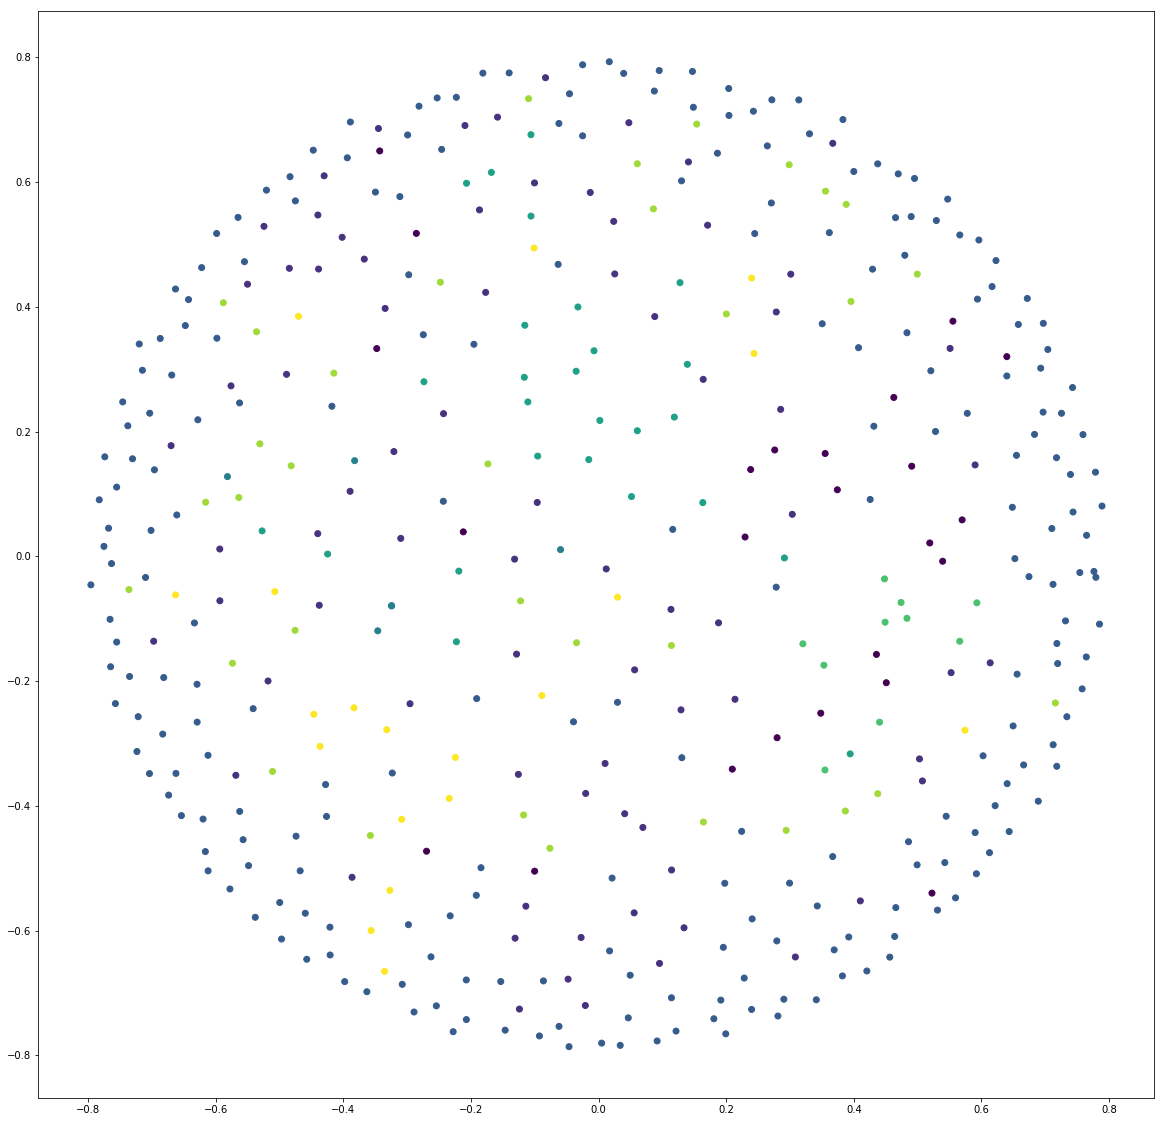

In [361]:
from sklearn.cluster import SpectralClustering

n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters, random_state=24, n_neighbors=8, 
                        gamma=0.01)
sc.fit(tfidf)

#Predicted clusters.
predict=sc.fit_predict(tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict)
plt.show()

In [362]:
labels = sc.labels_
Counter(labels)

Counter({2: 242, 5: 10, 0: 24, 1: 77, 4: 26, 7: 19, 3: 6, 6: 34})

In [363]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(tfidf)

clusters = km.labels_.tolist()
centers = km.cluster_centers_

Wall time: 1.17 s


In [364]:
Counter(clusters)

Counter({3: 247, 0: 62, 1: 55, 2: 44, 4: 30})

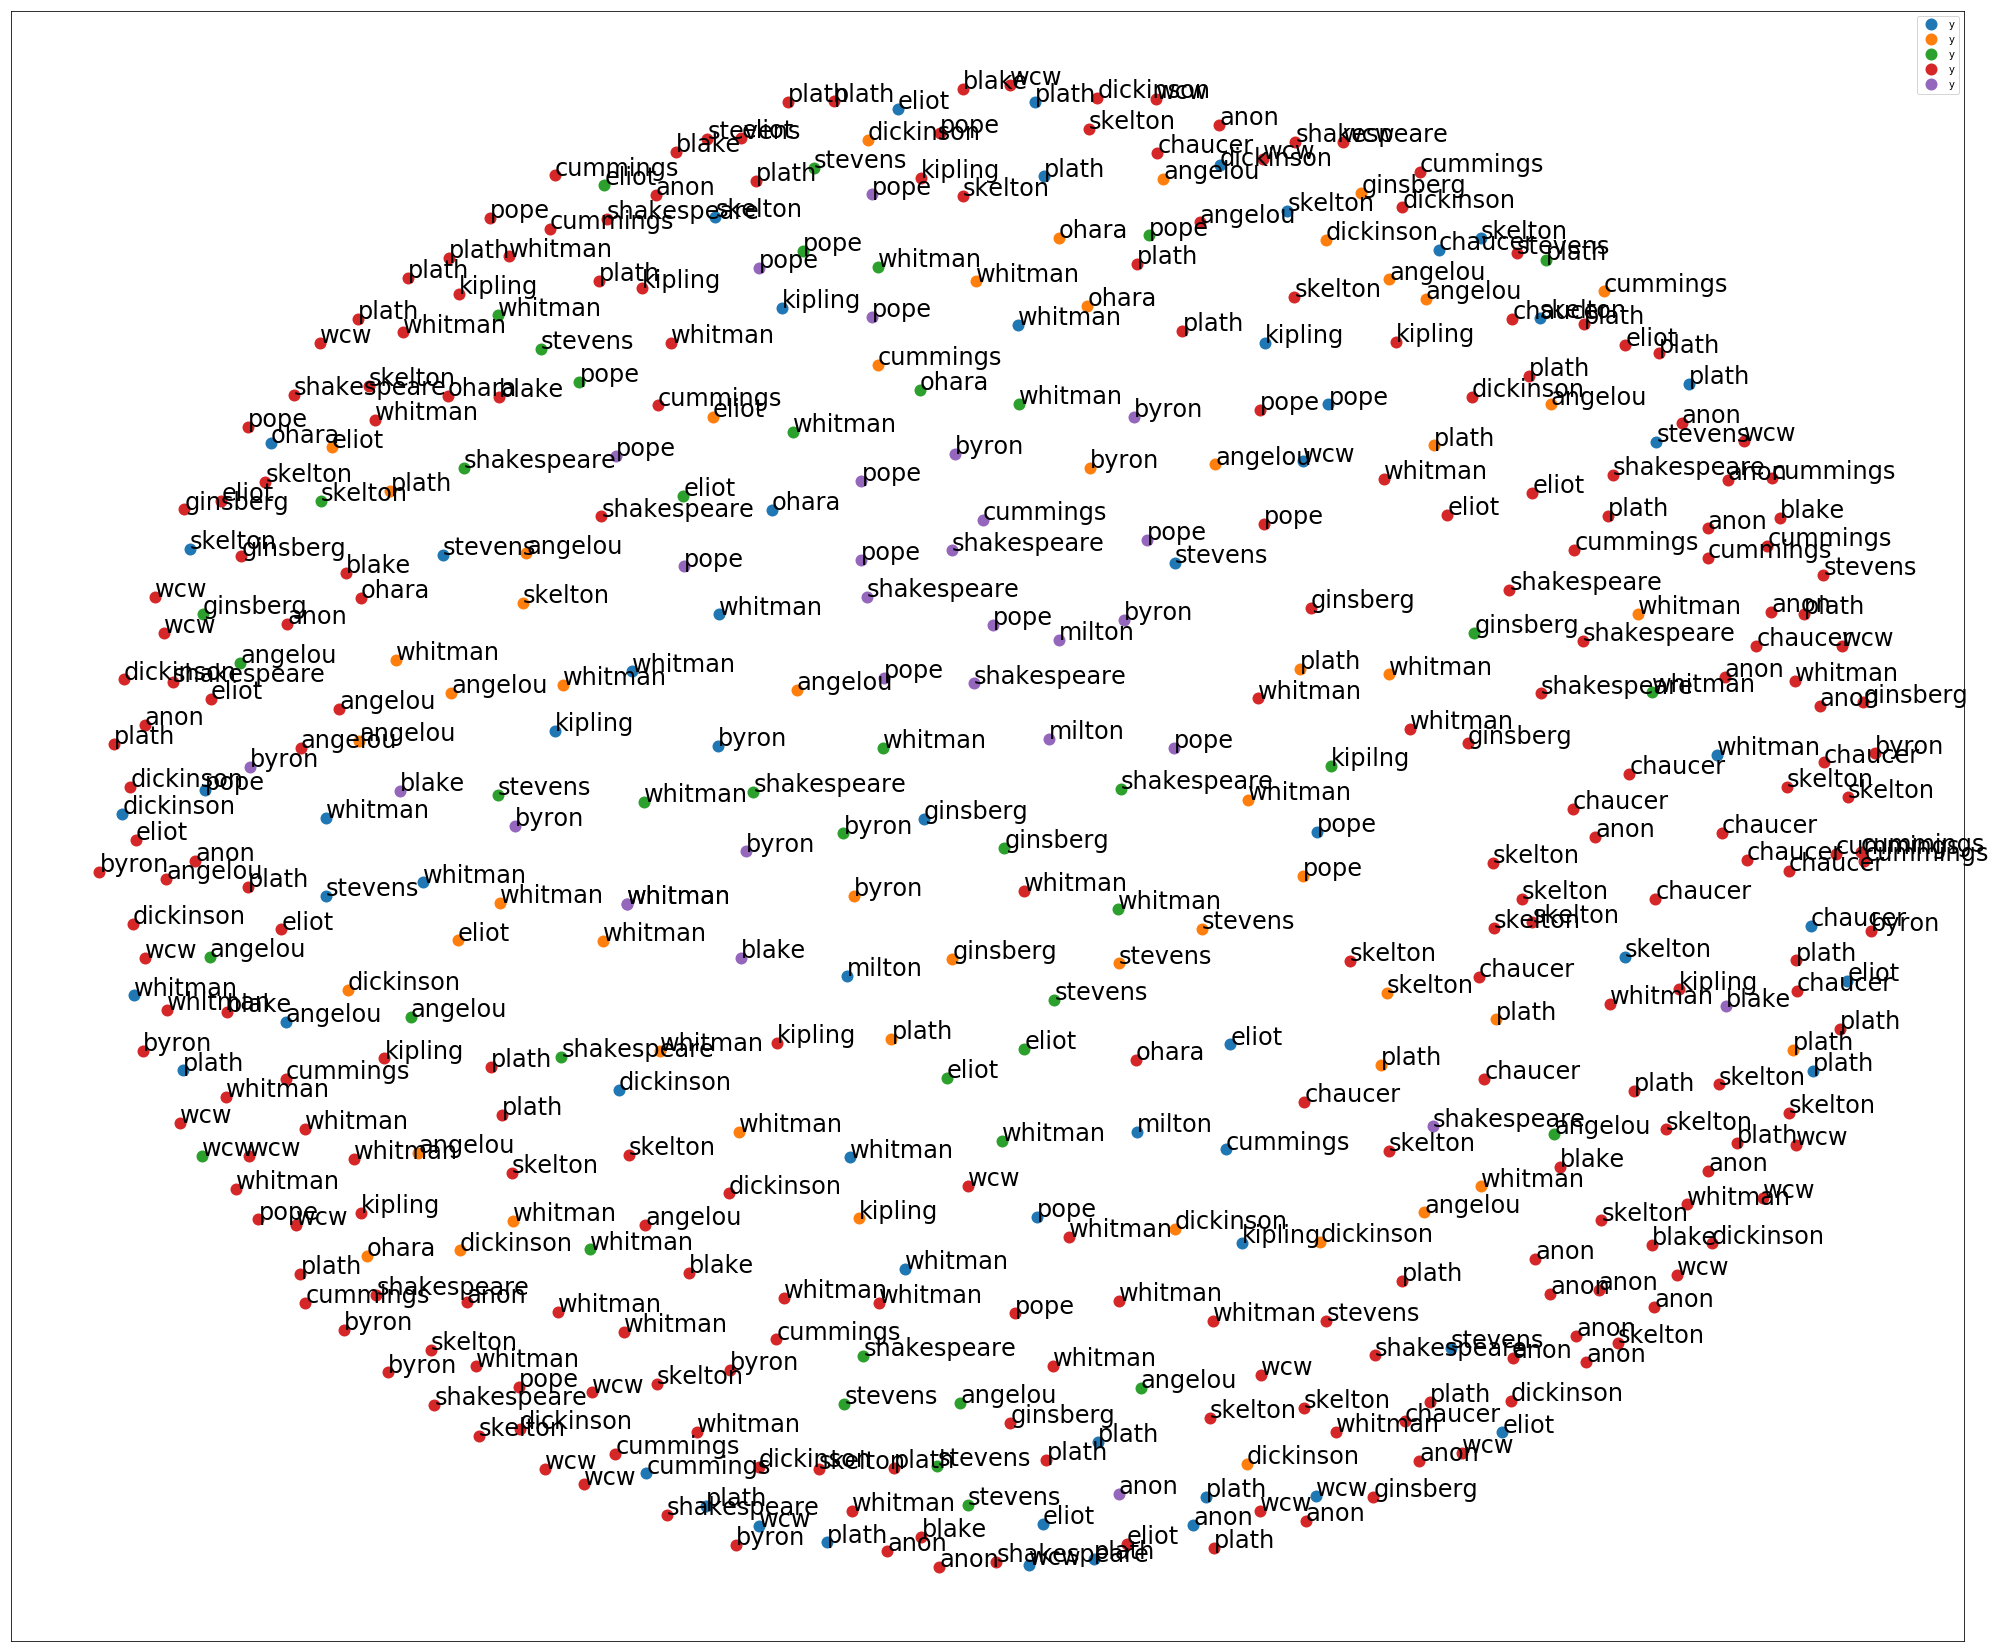

In [376]:
df_clusters = pd.DataFrame(dict(x=xs, y=ys, label=clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df_clusters)):
    ax.text(df_clusters.ix[i]['x'], df_clusters.ix[i]['y'], df_clusters.ix[i]['period'], size=24)  

    
    
plt.show() #show the plot

In [370]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=5, batch_size= 300, max_iter=10000, init='k-means++', random_state=24)
X = mbk.fit_transform(tfidf)
mini_clusters = mbk.labels_.tolist()

In [371]:
Counter(mini_clusters)

Counter({0: 260, 2: 92, 3: 33, 4: 29, 1: 24})

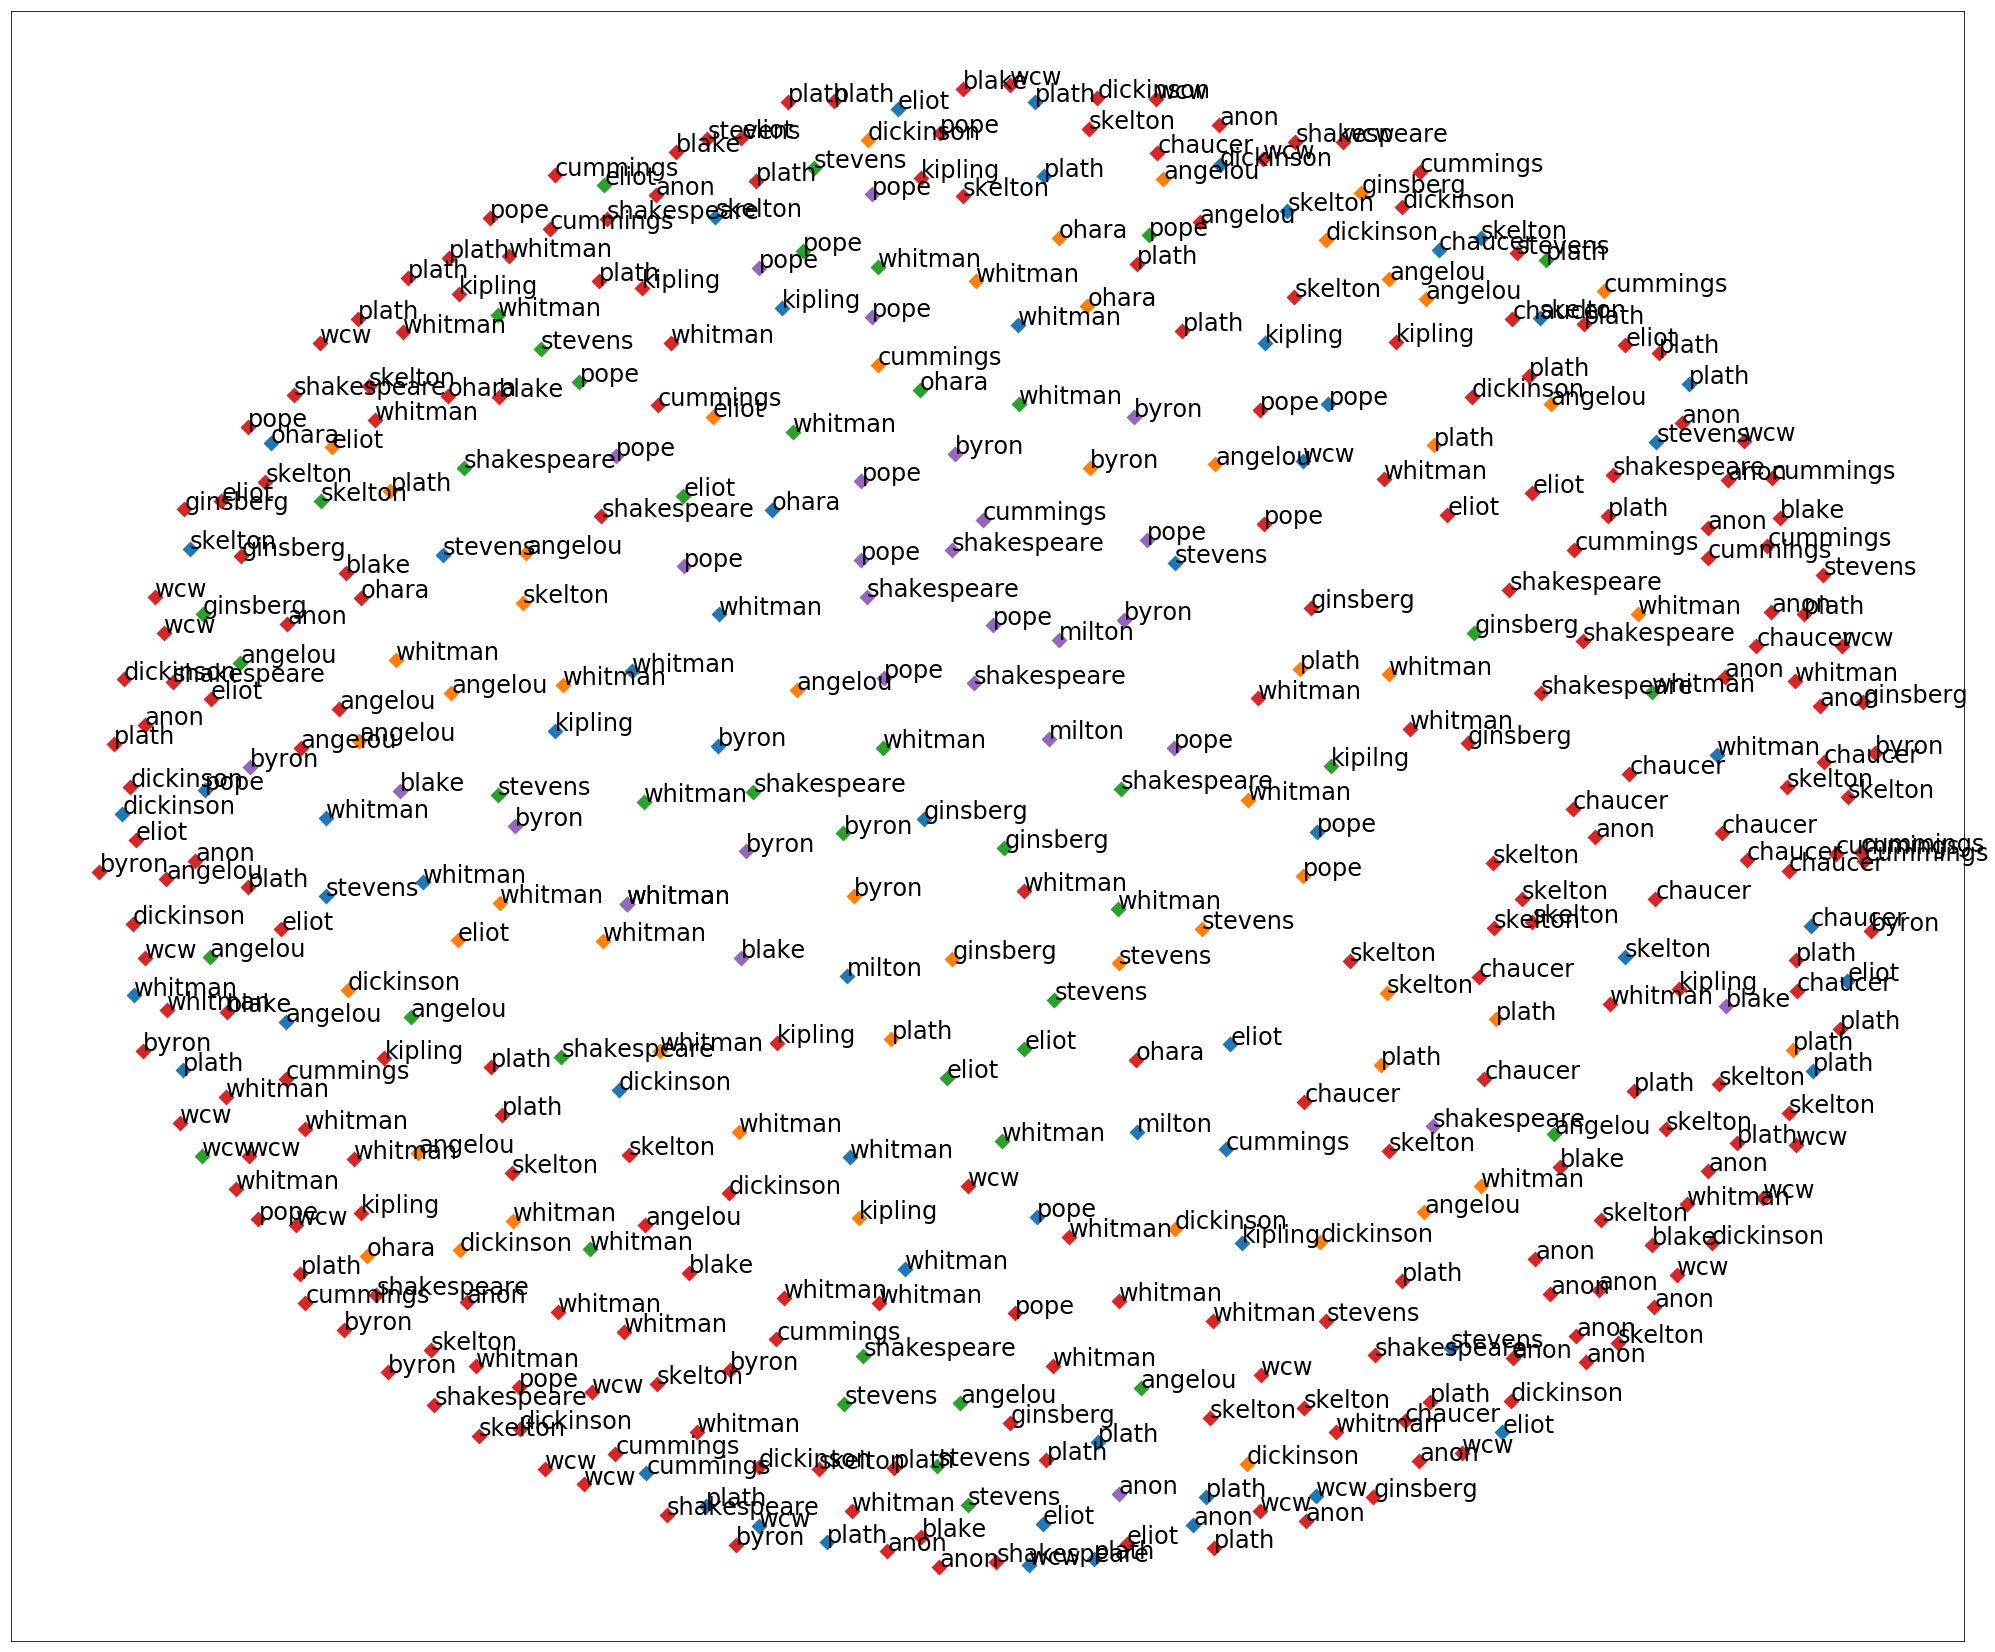

In [375]:
df_mini = pd.DataFrame(dict(x=xs, y=ys, label=mini_clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups_mini = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups_mini:
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')

for i in range(len(df_mini)):
    ax.text(df_mini.iloc[i,0], df_mini.iloc[i,1], df_mini.iloc[i,5], size=24)  

    
    
plt.show() #show the plot

In [333]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(tfidf.toarray(), quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(tfidf.toarray())

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


In [377]:
terms = vectorizer.get_feature_names()
order_centroids_mbk = mbk.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_mbk[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: thy ye thee love bird thou dead men woman let
Cluster 1: night sea day singing word whisperd blow listen let sound
Cluster 2: white theyr love crowd far wyth does come shine little
Cluster 3: world america passed shall im children old stand new death
Cluster 4: like rise clear want stars don death eyes going love


In [378]:
order_centroids_km = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_km[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: night singing heart day sea knew lyke crowd sang days
Cluster 1: like rise just love don death make america ll cool
Cluster 2: bird let sound wings wind sings night heard sea caged
Cluster 3: love ye white dead far wyth little al whan smile
Cluster 4: thee thy thou shall america let st aught blow art


In [353]:
pd.options.display.max_rows = 4000
print(stanza_df)

                  title       author        period  \
0                 truth      chaucer     period 15   
1                 truth      chaucer     period 15   
2                 truth      chaucer     period 15   
3                 truth      chaucer     period 15   
4          torosemounde      chaucer     period 15   
5          torosemounde      chaucer     period 15   
6          torosemounde      chaucer     period 15   
7       troiluscriseyde      chaucer     period 15   
8       troiluscriseyde      chaucer     period 15   
9       troiluscriseyde      chaucer     period 15   
10      troiluscriseyde      chaucer     period 15   
11      troiluscriseyde      chaucer     period 15   
12      troiluscriseyde      chaucer     period 15   
13      troiluscriseyde      chaucer     period 15   
14      troiluscriseyde      chaucer     period 15   
15      troiluscriseyde      chaucer     period 15   
16      troiluscriseyde      chaucer     period 15   
17       phillipsparrow     

461  and i am sweating a lot by now and thinking of...  


In [367]:
stanza_df.drop([134,135,136,138,139,140,142,143,144,146,147,148,150,151,152, 
                154,155,156,158,159,160,162,163,164], inplace=True)
stanza_df.reset_index(inplace=True)

KeyError: '[134 135 136 138 139 140 142 143 144 146 147 148 150 151 152 154 155 156\n 158 159 160 162 163 164] not found in axis'

In [368]:
stanza_df.reset_index(inplace=True)